In [13]:
from shapely import Point
import matplotlib.pyplot as plt
import contextily as cx
from geopandas import GeoDataFrame

from config import Config
from graph_provider import GraphProvider
from dataset import Dataset

In [14]:
graph_provider = GraphProvider()
graph = graph_provider.get_graph()
dataset = Dataset()

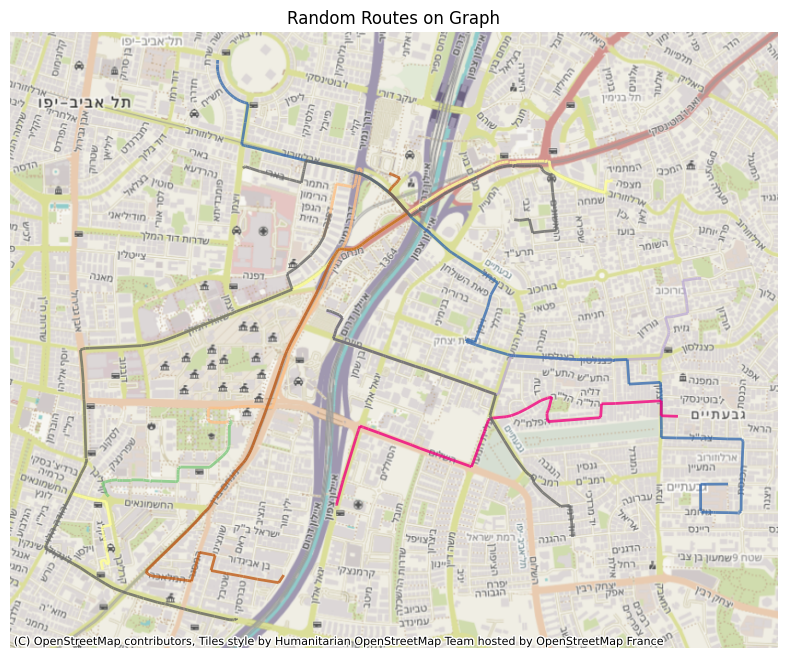

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
for i in range(10):
    start, end = dataset.get_random_vertices_pair(graph)
    route = graph.get_shortest_path(start, end, output='epath')
    geometries = graph.es[route]['geometry']
    color = plt.colormaps.get_cmap('Accent')
    GeoDataFrame(geometry=geometries, crs=Config.default_crs).plot(ax=ax, linewidth=2, color=color(i), alpha=0.8)

cx.add_basemap(ax, crs=Config.default_crs)
plt.title('Random Routes on Graph')
ax.set_axis_off()
plt.show()

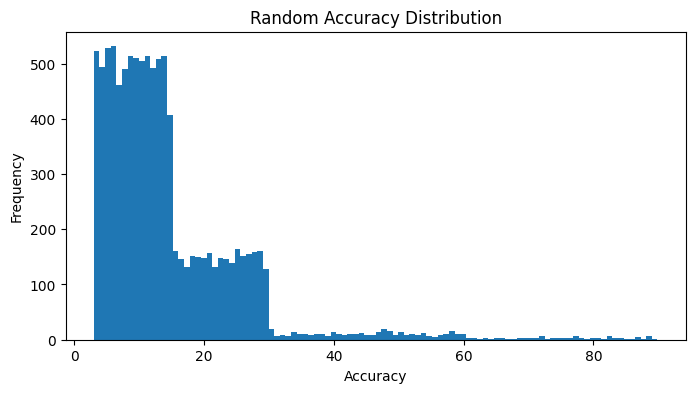

In [16]:
plt.figure(figsize=(8, 4))
accuracies = [dataset.get_random_accuracy() for _ in range(10000)]
plt.hist(accuracies, bins=100)
plt.title('Random Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

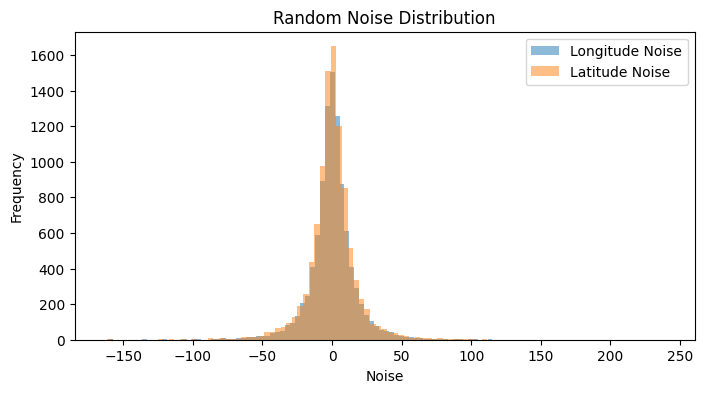

In [17]:
noise_long, noise_lat = [], []
for accuracy in accuracies:
    noise = dataset.get_coordinates_noise(accuracy)
    noise_long.append(noise[0])
    noise_lat.append(noise[1])
plt.figure(figsize=(8, 4))
plt.hist(noise_long, bins=100, alpha=0.5, label='Longitude Noise')
plt.hist(noise_lat, bins=100, alpha=0.5, label='Latitude Noise')
plt.title('Random Noise Distribution')
plt.xlabel('Noise')
plt.ylabel('Frequency')
plt.legend()
plt.show()


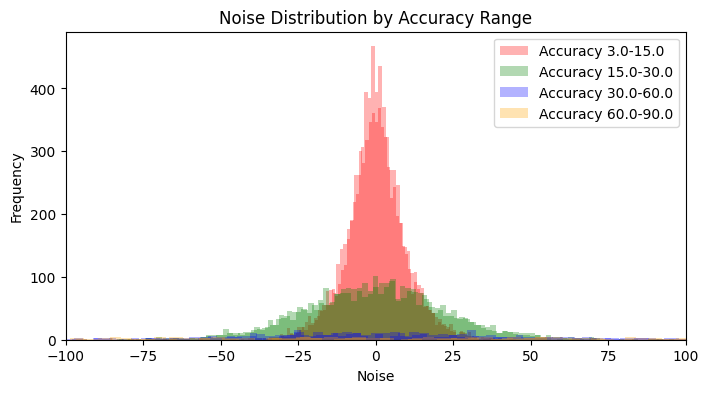

In [18]:
colors = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(8, 4))
for i, (low, high) in enumerate(Config.accuracy_ranges):
    noise_long, noise_lat = [], []
    for accuracy in accuracies:
        if low <= accuracy < high:
            noise = dataset.get_coordinates_noise(accuracy)
            noise_long.append(noise[0])
            noise_lat.append(noise[1])
    plt.hist(noise_long, bins=100, alpha=0.3, color=colors[i], label=f'Accuracy {low}-{high}')
    plt.hist(noise_lat, bins=100, alpha=0.3, color=colors[i])
    plt.xlim(-100, 100)
plt.title('Noise Distribution by Accuracy Range')
plt.xlabel('Noise')
plt.ylabel('Frequency')
plt.legend()
plt.show()

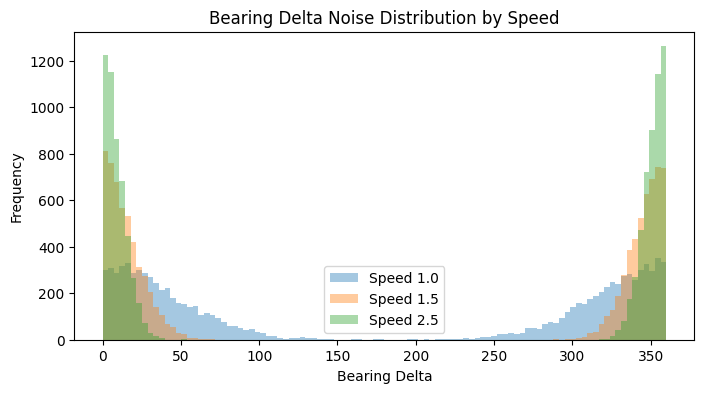

In [19]:
speed_options = [1.0, 1.5, 2.5]
bearing = 0.0
plt.figure(figsize=(8, 4))
# Generate plot for dataset.generate_noisy_bearing(bearing)
for speed in speed_options:
    bearing_delta = [dataset.generate_noisy_bearing(bearing, speed) for _ in range(10000)]
    plt.hist(bearing_delta, bins=100, alpha=0.4, label=f'Speed {speed}')
plt.title('Bearing Delta Noise Distribution by Speed')
plt.xlabel('Bearing Delta')
plt.ylabel('Frequency')
plt.legend()
plt.show()




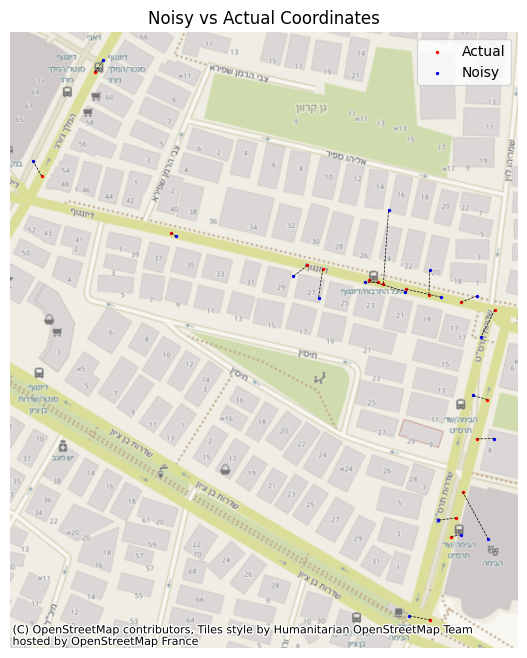

In [20]:
samples = dataset.get_samples(graph, n_routes=1)
samples = samples[0]
actual_cords = [(s['actual']['longitude'], s['actual']['latitude']) for s in samples]
actual_geo = [Point(p[0], p[1]) for p in actual_cords]
actual_geo = GeoDataFrame(geometry=actual_geo, crs=Config.default_crs)
noisy_cords = [(s['noisy']['longitude'], s['noisy']['latitude']) for s in samples]
noisy_geo = [Point(p[0], p[1]) for p in noisy_cords]
noisy_geo = GeoDataFrame(geometry=noisy_geo, crs=Config.default_crs)
fig, ax = plt.subplots(figsize=(16,8))
actual_geo.plot(ax=ax, markersize=2, color='red', label='Actual')
noisy_geo.plot(ax=ax, markersize=2, color='blue', label='Noisy')
# Plot the lines between actual and noisy points
for actual, noisy in zip(actual_geo.geometry, noisy_geo.geometry):
    ax.plot([actual.x, noisy.x], [actual.y, noisy.y], color='black', linestyle='dashed', linewidth=0.5)
cx.add_basemap(ax, crs=Config.default_crs)
plt.title('Noisy vs Actual Coordinates')
ax.set_axis_off()
plt.legend()
plt.show()
